In [1]:
#name: nada mossad abodegham
#code: 320210097
#AID S2 G1

In [2]:
# Uploading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# loading the data
data = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train",
    batch_size=64,seed=42,label_mode='categorical', shuffle=True)

Found 42559 files belonging to 65 classes.


In [4]:
#order of class with data
class_names = data.class_names
print("Class Names:", class_names)

Class Names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [5]:
# make it gray scale , no need for colors
data = data.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))

In [6]:
#batch
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


(256, 256, 1)


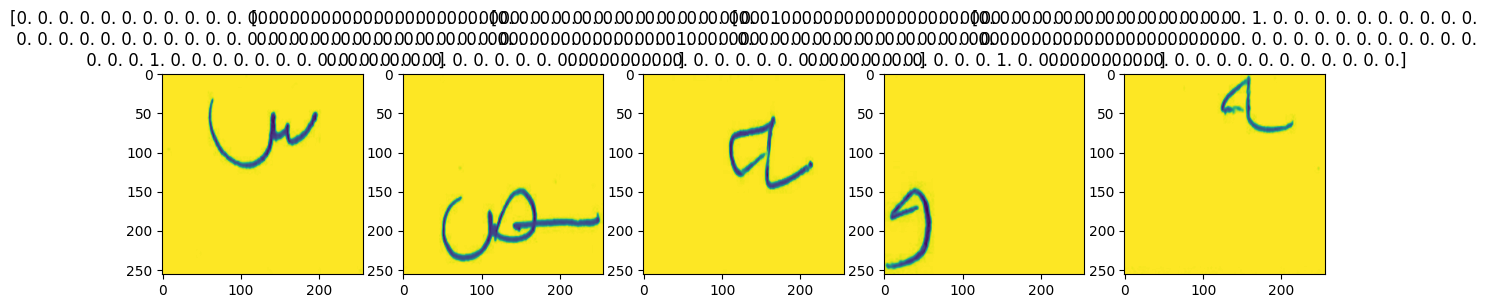

In [7]:
# drawing some of images
fig, ax = plt.subplots(1, 5, figsize=(15, 10))
for idx, (img, title) in enumerate(zip(batch[0][:5], batch[1][:5])):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(title)
print(img.shape)
plt.show()

In [8]:
# splitting into train and test
train_size = int(len(data) * 0.8)
test_size= int(len(data) * 0.2)
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [9]:
# Prepare the model
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(256,256, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(65, activation='softmax'))

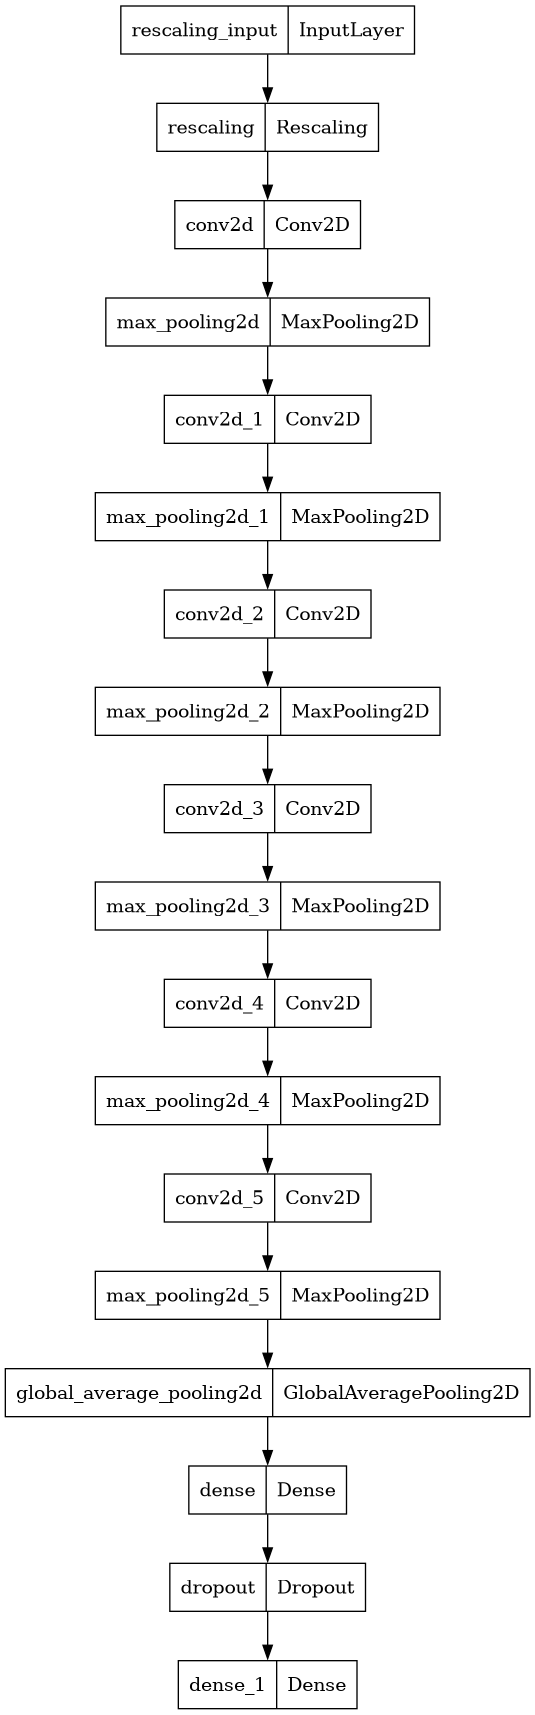

In [10]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        3

In [12]:
#compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy", metrics=["accuracy"],)

In [13]:
#training the model 
history = model.fit(train, epochs=50, validation_data=test)

Epoch 1/50
532/532 [==============================] - 112s 185ms/step - loss: 4.3491 - accuracy: 0.0143 - val_loss: 4.2128 - val_accuracy: 0.0161
Epoch 2/50
532/532 [==============================] - 90s 169ms/step - loss: 3.8361 - accuracy: 0.0600 - val_loss: 3.1829 - val_accuracy: 0.1686
Epoch 3/50
532/532 [==============================] - 90s 168ms/step - loss: 2.7717 - accuracy: 0.2485 - val_loss: 2.1367 - val_accuracy: 0.4249
Epoch 4/50
532/532 [==============================] - 89s 167ms/step - loss: 1.9733 - accuracy: 0.4342 - val_loss: 1.5848 - val_accuracy: 0.5520
Epoch 5/50
532/532 [==============================] - 90s 169ms/step - loss: 1.5621 - accuracy: 0.5397 - val_loss: 1.2855 - val_accuracy: 0.6324
Epoch 6/50
532/532 [==============================] - 90s 168ms/step - loss: 1.3081 - accuracy: 0.6105 - val_loss: 1.0979 - val_accuracy: 0.6825
Epoch 7/50
532/532 [==============================] - 90s 169ms/step - loss: 1.1429 - accuracy: 0.6594 - val_loss: 0.9942 - val_a

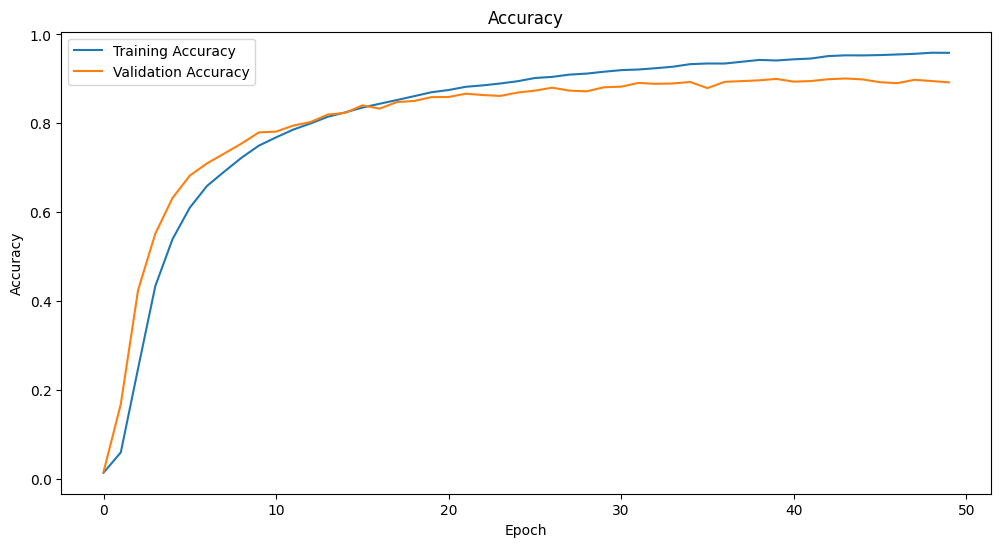

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

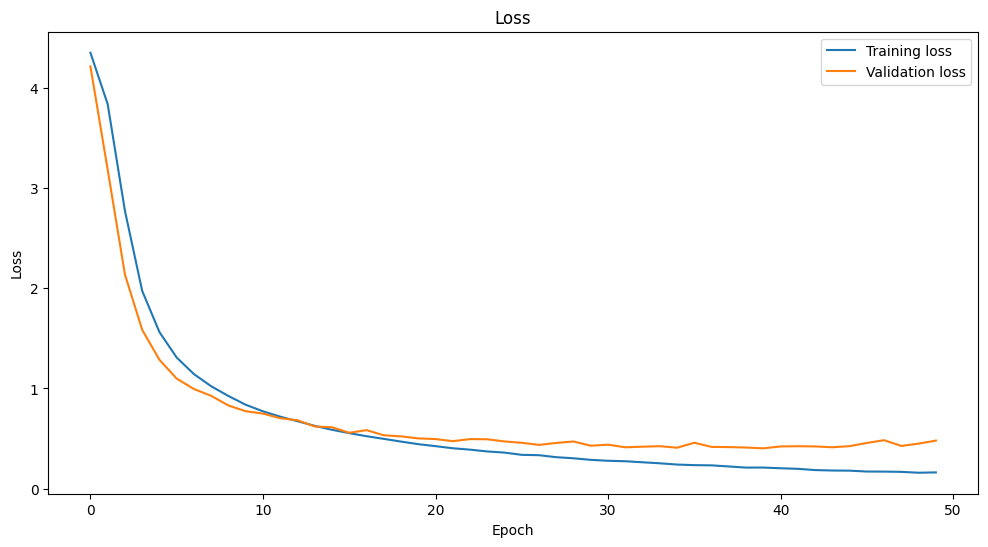

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [16]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in test], axis=0)
true_labels = np.argmax(true_labels, axis=1)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
for i in conf_matrix:
    print(i)

133/133 [==============================] - 40s 70ms/step
[1 3 1 1 1 2 1 1 5 2 4 1 2 1 2 2 3 4 0 2 4 5 0 5 3 0 1 2 1 1 0 2 1 0 1 4 1
 3 0 2 2 2 3 3 6 3 4 3 2 0 2 0 4 2 1 0 1 1 1 3 3 1 1 0 1]
[1 4 0 0 1 1 3 1 0 4 2 0 1 2 3 2 3 1 6 3 3 1 1 1 5 4 1 3 2 6 1 1 4 5 2 4 1
 0 2 1 6 3 2 1 1 0 2 1 3 4 2 1 5 1 3 2 2 1 0 2 5 0 0 2 3]
[2 1 4 1 1 3 0 2 2 2 3 5 0 0 7 2 0 2 2 1 0 3 2 2 1 2 3 1 1 3 3 3 2 6 1 3 4
 2 2 4 2 1 1 1 0 1 1 2 1 2 1 6 3 4 0 2 3 2 3 1 3 2 1 2 2]
[1 1 2 2 2 0 1 2 5 3 4 1 5 5 0 2 3 3 3 2 2 3 1 0 3 1 2 4 1 2 1 3 2 2 2 4 3
 0 3 1 2 1 2 2 4 2 5 0 0 2 1 3 1 0 3 1 4 1 1 2 1 2 1 0 1]
[2 2 2 2 6 0 1 3 1 1 2 1 1 2 3 2 3 0 1 0 8 1 2 3 0 1 1 2 2 4 1 4 0 0 1 1 1
 2 4 4 1 0 1 1 2 0 3 3 2 4 3 2 4 0 3 1 4 3 1 3 2 2 2 3 2]
[1 4 4 1 3 2 1 2 0 3 3 3 0 2 1 2 4 0 0 3 1 3 1 0 2 4 3 4 2 2 1 4 2 2 1 1 3
 2 2 1 5 1 2 5 2 0 1 0 2 5 1 1 3 0 3 0 4 4 3 2 2 0 3 5 2]
[1 0 0 3 1 0 1 2 1 1 1 3 2 1 2 3 0 3 1 2 2 2 0 2 2 1 4 3 3 2 5 2 2 1 4 2 1
 2 2 3 3 2 2 2 5 2 1 3 1 2 0 0 1 3 2 3 0 4 0 3 0 2 2 1 2]
[2 3 1 2 0 1

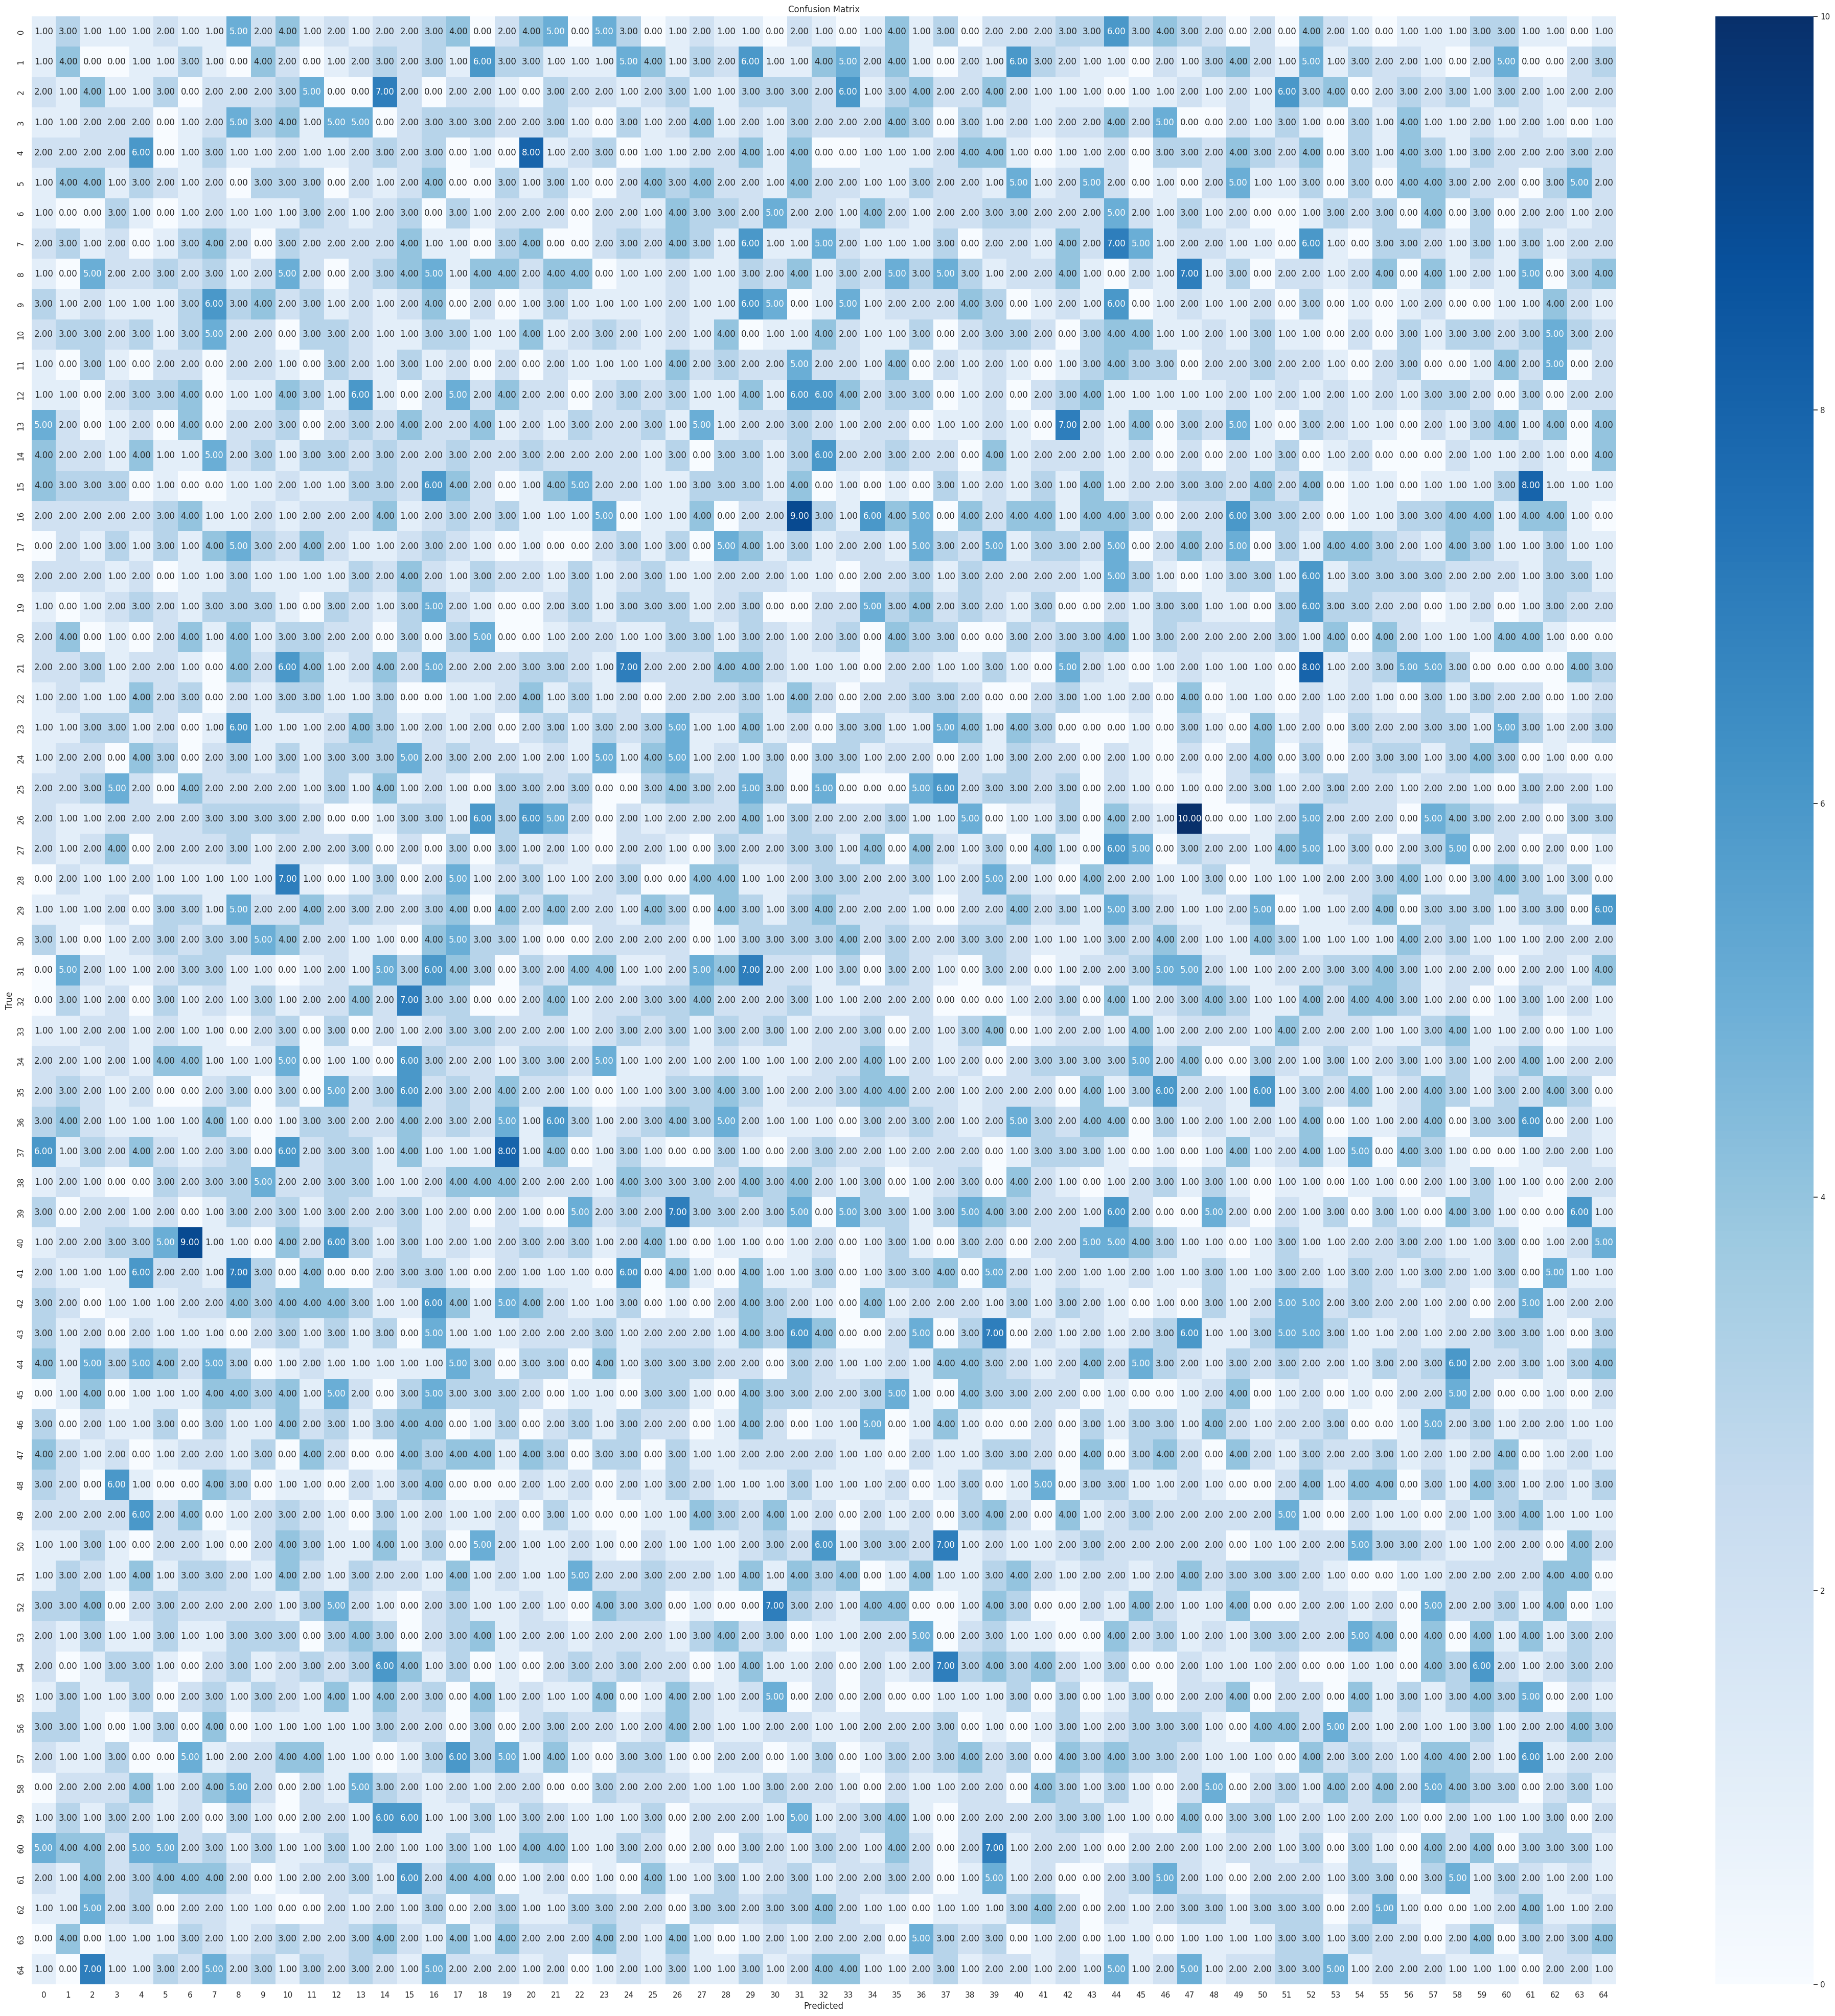

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize': (50, 50)})  # Size in inches
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.2f')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("/kaggle/working/" + 'Confusion Matrix')
plt.show()

In [18]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

test_dir = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test"
predictions = []
for filename in os.listdir(test_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(test_dir, filename)
        img = image.load_img(image_path, color_mode='grayscale', target_size=(256, 256))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        pred = model.predict(img)
        predicted_class_index = np.argmax(pred[0])
        predicted_class_label = class_names[predicted_class_index]
        predictions.append([filename[:-4], predicted_class_label])
predictions

1/1 [==============================] - 0s 20ms/step


[['9273', '5'],
 ['9292', '41'],
 ['4353', '55'],
 ['7968', '52'],
 ['6490', '44'],
 ['5511', '39'],
 ['6262', '43'],
 ['2664', '22'],
 ['8419', '55'],
 ['9703', '62'],
 ['2539', '21'],
 ['9110', '59'],
 ['5703', '4'],
 ['1231', '14'],
 ['1017', '13'],
 ['4803', '35'],
 ['7197', '49'],
 ['2437', '20'],
 ['7530', '50'],
 ['3217', '25'],
 ['5695', '4'],
 ['8565', '56'],
 ['6441', '42'],
 ['6692', '42'],
 ['5106', '37'],
 ['5590', '37'],
 ['3207', '25'],
 ['2015', '19'],
 ['2300', '43'],
 ['2673', '22'],
 ['2823', '25'],
 ['3765', '23'],
 ['1522', '17'],
 ['4747', '35'],
 ['6720', '46'],
 ['9938', '63'],
 ['6811', '46'],
 ['10188', '47'],
 ['3824', '3'],
 ['7726', '51'],
 ['6131', '42'],
 ['4358', '32'],
 ['2064', '19'],
 ['6456', '44'],
 ['641', '10'],
 ['7324', '49'],
 ['1088', '32'],
 ['173', '0'],
 ['5100', '37'],
 ['7863', '52'],
 ['9246', '32'],
 ['2851', '23'],
 ['6875', '47'],
 ['8414', '55'],
 ['8841', '58'],
 ['2448', '20'],
 ['7992', '52'],
 ['7290', '49'],
 ['7334', '49'],
 ['

In [19]:
#export file
temp = pd.DataFrame(predictions, columns=["ID", "Label"])
temp.to_csv("ff.csv", index=False)